<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Datananalyse_Test_Sarah_F%C3%A4ssler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gdown

#https://drive.google.com/file/d/1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU/view?usp=drive_link

# Die Datei-ID aus dem Google Drive-Link
file_id = '1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU'
destination = '/content/Datensatz_komplett.csv'

# Datei herunterladen
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU
From (redirected): https://drive.google.com/uc?id=1nzKawzmobJgL1FYoRczZVbzWjzHzYWQU&confirm=t&uuid=b83b014a-48b2-4553-a01f-92d5579fdb62
To: /content/Datensatz_komplett.csv
100%|██████████| 1.74G/1.74G [00:18<00:00, 91.7MB/s]


'/content/Datensatz_komplett.csv'

In [4]:
# Lade die heruntergeladene CSV-Datei
df = pd.read_csv('/content/Datensatz_komplett.csv')

# Zeige die ersten paar Zeilen der Datei an
print(df.head(10))


   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
8           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
9           12                    Glattpark  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] WETTERSTATION  \
0  2024-01-01 04:37:09               REAL             69.0        NABZUE   
1  2024-01-01 04:38:08               REAL             68.0        NABZUE   
2  2024-01-01 04:39:12 

In [6]:
# Anzeigen der ersten 5 Zeilen des DataFrames
display(df.head(5))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.396090,8.545105


In [61]:
#Anzahl pro Verspätung in Sekunden

df['VERSPAETUNG [s]'].value_counts().sort_index()

,count
VERSPAETUNG [s],
61.0,182614
62.0,204329
63.0,202478
64.0,202079
65.0,193568
66.0,191430
67.0,166300
68.0,183519
69.0,181530


In [62]:
# Entscheidungstabelle zur Auswahl der Top-X-Werte
top_x_info = pd.DataFrame({
    'Top X': ['Top 100', 'Top 1 000', 'Top 10 000', 'Top 50 000', 'Top 100 000'],
    'Verspätung ab ca. (Sekunden)': ['> 1000 s', '~ 700–800 s', '~ 300 s', '~ 180–200 s', '~ 150 s'],
    'Einschätzung': [
        '🟥 Extrem extrem (selten!)',
        '🟧 Sehr extrem',
        '🟨 Deutlich über Durchschnitt',
        '🟦 Noch oberhalb „normal“',
        '🟩 Schon Richtung häufig'
    ]
})

# Tabelle anzeigen
display(top_x_info)

,Top X,Verspätung ab ca. (Sekunden),Einschätzung
0,Top 100,> 1000 s,🟥 Extrem extrem (selten!)
1,Top 1 000,~ 700–800 s,🟧 Sehr extrem
2,Top 10 000,~ 300 s,🟨 Deutlich über Durchschnitt
3,Top 50 000,~ 180–200 s,🟦 Noch oberhalb „normal“
4,Top 100 000,~ 150 s,🟩 Schon Richtung häufig


In [26]:
# Sicherstellen, dass Verspätung als Zahl gespeichert ist
df['VERSPAETUNG [s]'] = pd.to_numeric(df['VERSPAETUNG [s]'], errors='coerce')

# Sortieren nach höchster Verspätung
df_sorted = df.sort_values(by='VERSPAETUNG [s]', ascending=False)

# Die Top 5000 Verspätungen extrahieren
top5000 = df_sorted.head(5000).copy()

# Kontrollieren – z. B. anzeigen
display(top5000[['ABFAHRTSZEIT', 'HALTESTELLEN_NAME', 'VERSPAETUNG [s]']])

,ABFAHRTSZEIT,HALTESTELLEN_NAME,VERSPAETUNG [s]
1967839,2024-03-06 11:00:00,"Zürich, Wetlistrasse",1800.0
3745917,2024-08-10 09:06:00,"Zürich, Laubiweg",1800.0
8731403,2024-11-22 07:43:00,"Zürich, Friedhof Enzenbühl",1800.0
8478728,2024-03-22 20:27:00,"Zürich, Sihlquai/HB",1800.0
7296541,2024-04-19 11:47:00,"Zürich, Farbhof",1800.0
...,...,...,...
6512596,2024-05-17 16:18:00,"Zürich, Kunsthaus",1356.0
945527,2024-08-03 20:21:00,"Zürich, Wildbachstrasse",1355.0
945528,2024-08-03 20:21:00,"Zürich, Fröhlichstrasse",1355.0
1519855,2024-02-05 11:31:00,"Zürich, Limmatplatz",1355.0


In [30]:
print(top5000['VERSPAETUNG [s]'].describe())

count    5000.000000
mean     1556.814800
std       129.196183
min      1355.000000
25%      1444.000000
50%      1544.000000
75%      1667.000000
max      1800.000000
Name: VERSPAETUNG [s], dtype: float64


<Axes: title={'center': 'Top 5000 Verspätungen nach Monat'}, xlabel='Monat'>

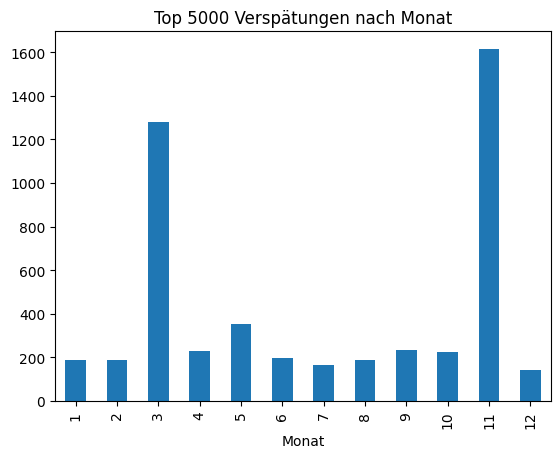

In [64]:
#Verspätungen nach Monat
top5000['Monat'] = pd.to_datetime(top5000['ABFAHRTSZEIT']).dt.month
top5000['Stunde'] = pd.to_datetime(top5000['ABFAHRTSZEIT']).dt.hour

top5000['Monat'].value_counts().sort_index().plot(kind='bar', title='Top 5000 Verspätungen nach Monat')

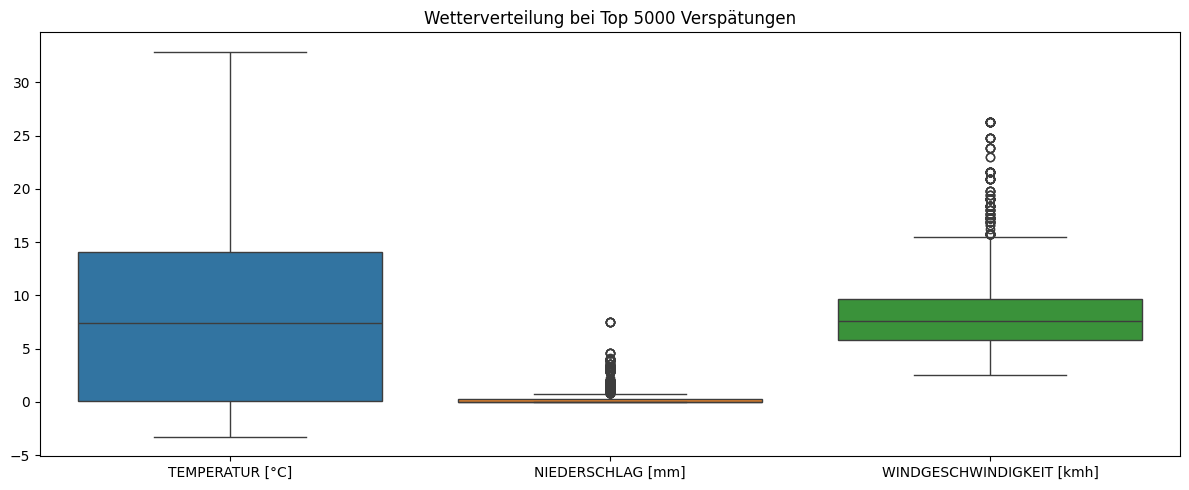

In [63]:
# Wetterverteilung bei Top 5000 Verspätungen

plt.figure(figsize=(12, 5))
sns.boxplot(data=top5000[['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]']])
plt.title('Wetterverteilung bei Top 5000 Verspätungen')
plt.tight_layout()
plt.show()

In [37]:
# Wetterstatistik sichten

display(top5000[['TEMPERATUR [°C]',
                 'NIEDERSCHLAG [mm]',
                 'WINDGESCHWINDIGKEIT [kmh]',
                 'NEUSCHNEEHOEHE [cm]',
                 'TAG_MIT_NEBEL',
                 'TAG_MIT_HAGEL']].describe())

,TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],TAG_MIT_NEBEL,TAG_MIT_HAGEL
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,8.501144,0.501967,8.151802,2.953442,0.153723,0.002609
std,8.340135,1.100713,3.580936,6.279634,0.360719,0.051016
min,-3.300000,0.000000,2.500000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,5.800000,0.000000,0.000000,0.000000
50%,7.400000,0.000000,7.600000,0.000000,0.000000,0.000000
75%,14.100000,0.300000,9.700000,1.000000,0.000000,0.000000
max,32.900000,7.500000,26.300000,17.000000,1.000000,1.000000


In [67]:
# Zusammenfassung Anteil der Wetterverhältnissen

print("🌦️ Wetterverhältnisse bei Top 5000 Verspätungen:")
print(f"• Wind > 20 km/h:           {wind_extrem:.2f}%")
print(f"• Niederschlag > 3 mm:      {regen_extrem:.2f}%")
print(f"• Neuschnee > 5 cm:         {schnee_extrem:.2f}%")
print(f"• Frost (Temp < 0°C):       {frost:.2f}%")
print(f"• Nebel:                    {nebel:.2f}%")
print(f"• Hagel:                    {hagel:.2f}%")

🌦️ Wetterverhältnisse bei Top 5000 Verspätungen:
• Wind > 20 km/h:           1.08%
• Niederschlag > 3 mm:      10.10%
• Neuschnee > 5 cm:         16.54%
• Frost (Temp < 0°C):       14.50%
• Nebel:                    15.32%
• Hagel:                    0.26%


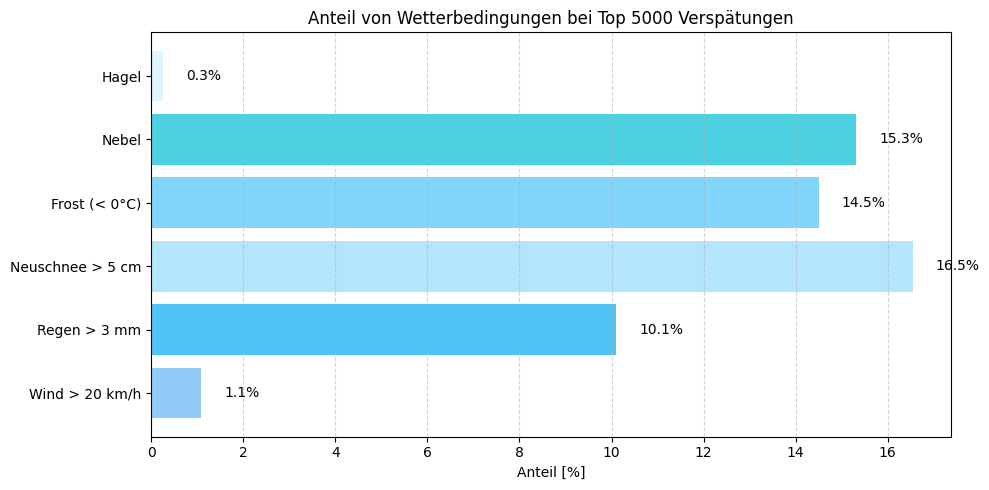

In [60]:
# Balkendiagramm mit Anteil von Wetterbedingungen bei Top 5000 Verspätungen inkl Beschriftungen

labels = ['Wind > 20 km/h', 'Regen > 3 mm', 'Neuschnee > 5 cm',
          'Frost (< 0°C)', 'Nebel', 'Hagel']
werte = [wind_extrem, regen_extrem, schnee_extrem, frost, nebel, hagel]
farben = ['#90CAF9', '#4FC3F7', '#B3E5FC', '#81D4FA', '#4DD0E1', '#E1F5FE']

plt.figure(figsize=(10, 5))
bars = plt.barh(labels, werte, color=farben)

for i, v in enumerate(werte):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10)

plt.xlabel("Anteil [%]")
plt.title("Anteil von Wetterbedingungen bei Top 5000 Verspätungen")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [70]:
# Vergleich Top 5000 mit Anteil im gesamten Datensatz

# Anteil im gesamten Datensatz berechnen
gesamt_wind_extrem = (df['WINDGESCHWINDIGKEIT [kmh]'] > 20).mean() * 100
gesamt_regen_extrem = (df['NIEDERSCHLAG [mm]'] > 3).mean() * 100
gesamt_schnee_extrem = (df['NEUSCHNEEHOEHE [cm]'] > 5).mean() * 100
gesamt_frost = (df['TEMPERATUR [°C]'] < 0).mean() * 100
gesamt_nebel = df['TAG_MIT_NEBEL'].mean() * 100
gesamt_hagel = df['TAG_MIT_HAGEL'].mean() * 100

# Zusammenfassung drucken
print("Vergleich Top 5000 vs. Gesamtdatensatz:\n")
print(f"• Wind > 20 km/h:     {wind_extrem:.2f}% (Top 5000) vs. {gesamt_wind_extrem:.2f}% (gesamt)")
print(f"• Regen > 3 mm:       {regen_extrem:.2f}% vs. {gesamt_regen_extrem:.2f}%")
print(f"• Neuschnee > 5 cm:   {schnee_extrem:.2f}% vs. {gesamt_schnee_extrem:.2f}%")
print(f"• Frost (< 0°C):      {frost:.2f}% vs. {gesamt_frost:.2f}%")
print(f"• Nebel:              {nebel:.2f}% vs. {gesamt_nebel:.2f}%")
print(f"• Hagel:              {hagel:.2f}% vs. {gesamt_hagel:.2f}%")

Vergleich Top 5000 vs. Gesamtdatensatz:

• Wind > 20 km/h:     1.08% (Top 5000) vs. 1.49% (gesamt)
• Regen > 3 mm:       10.10% vs. 0.87%
• Neuschnee > 5 cm:   16.54% vs. 0.35%
• Frost (< 0°C):      14.50% vs. 3.53%
• Nebel:              15.32% vs. 11.20%
• Hagel:              0.26% vs. 0.33%


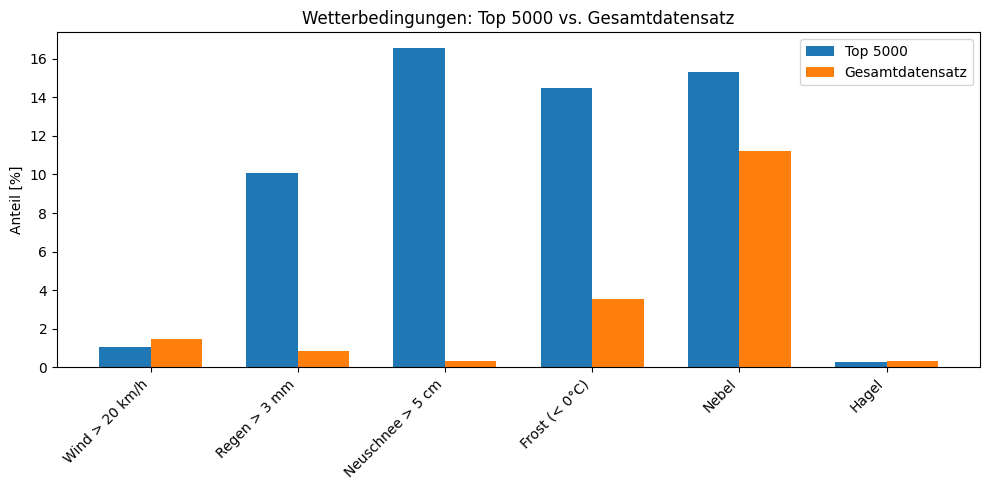

In [74]:
labels = ['Wind > 20 km/h', 'Regen > 3 mm', 'Neuschnee > 5 cm', 'Frost (< 0°C)', 'Nebel', 'Hagel']
top_values = [wind_extrem, regen_extrem, schnee_extrem, frost, nebel, hagel]
gesamt_values = [gesamt_wind_extrem, gesamt_regen_extrem, gesamt_schnee_extrem, gesamt_frost, gesamt_nebel, gesamt_hagel]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, top_values, width, label='Top 5000', color='#1f77b4')
plt.bar(x + width/2, gesamt_values, width, label='Gesamtdatensatz', color='#ff7f0e')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Anteil [%]')
plt.title('Wetterbedingungen: Top 5000 vs. Gesamtdatensatz')
plt.legend()
plt.tight_layout()
plt.show()

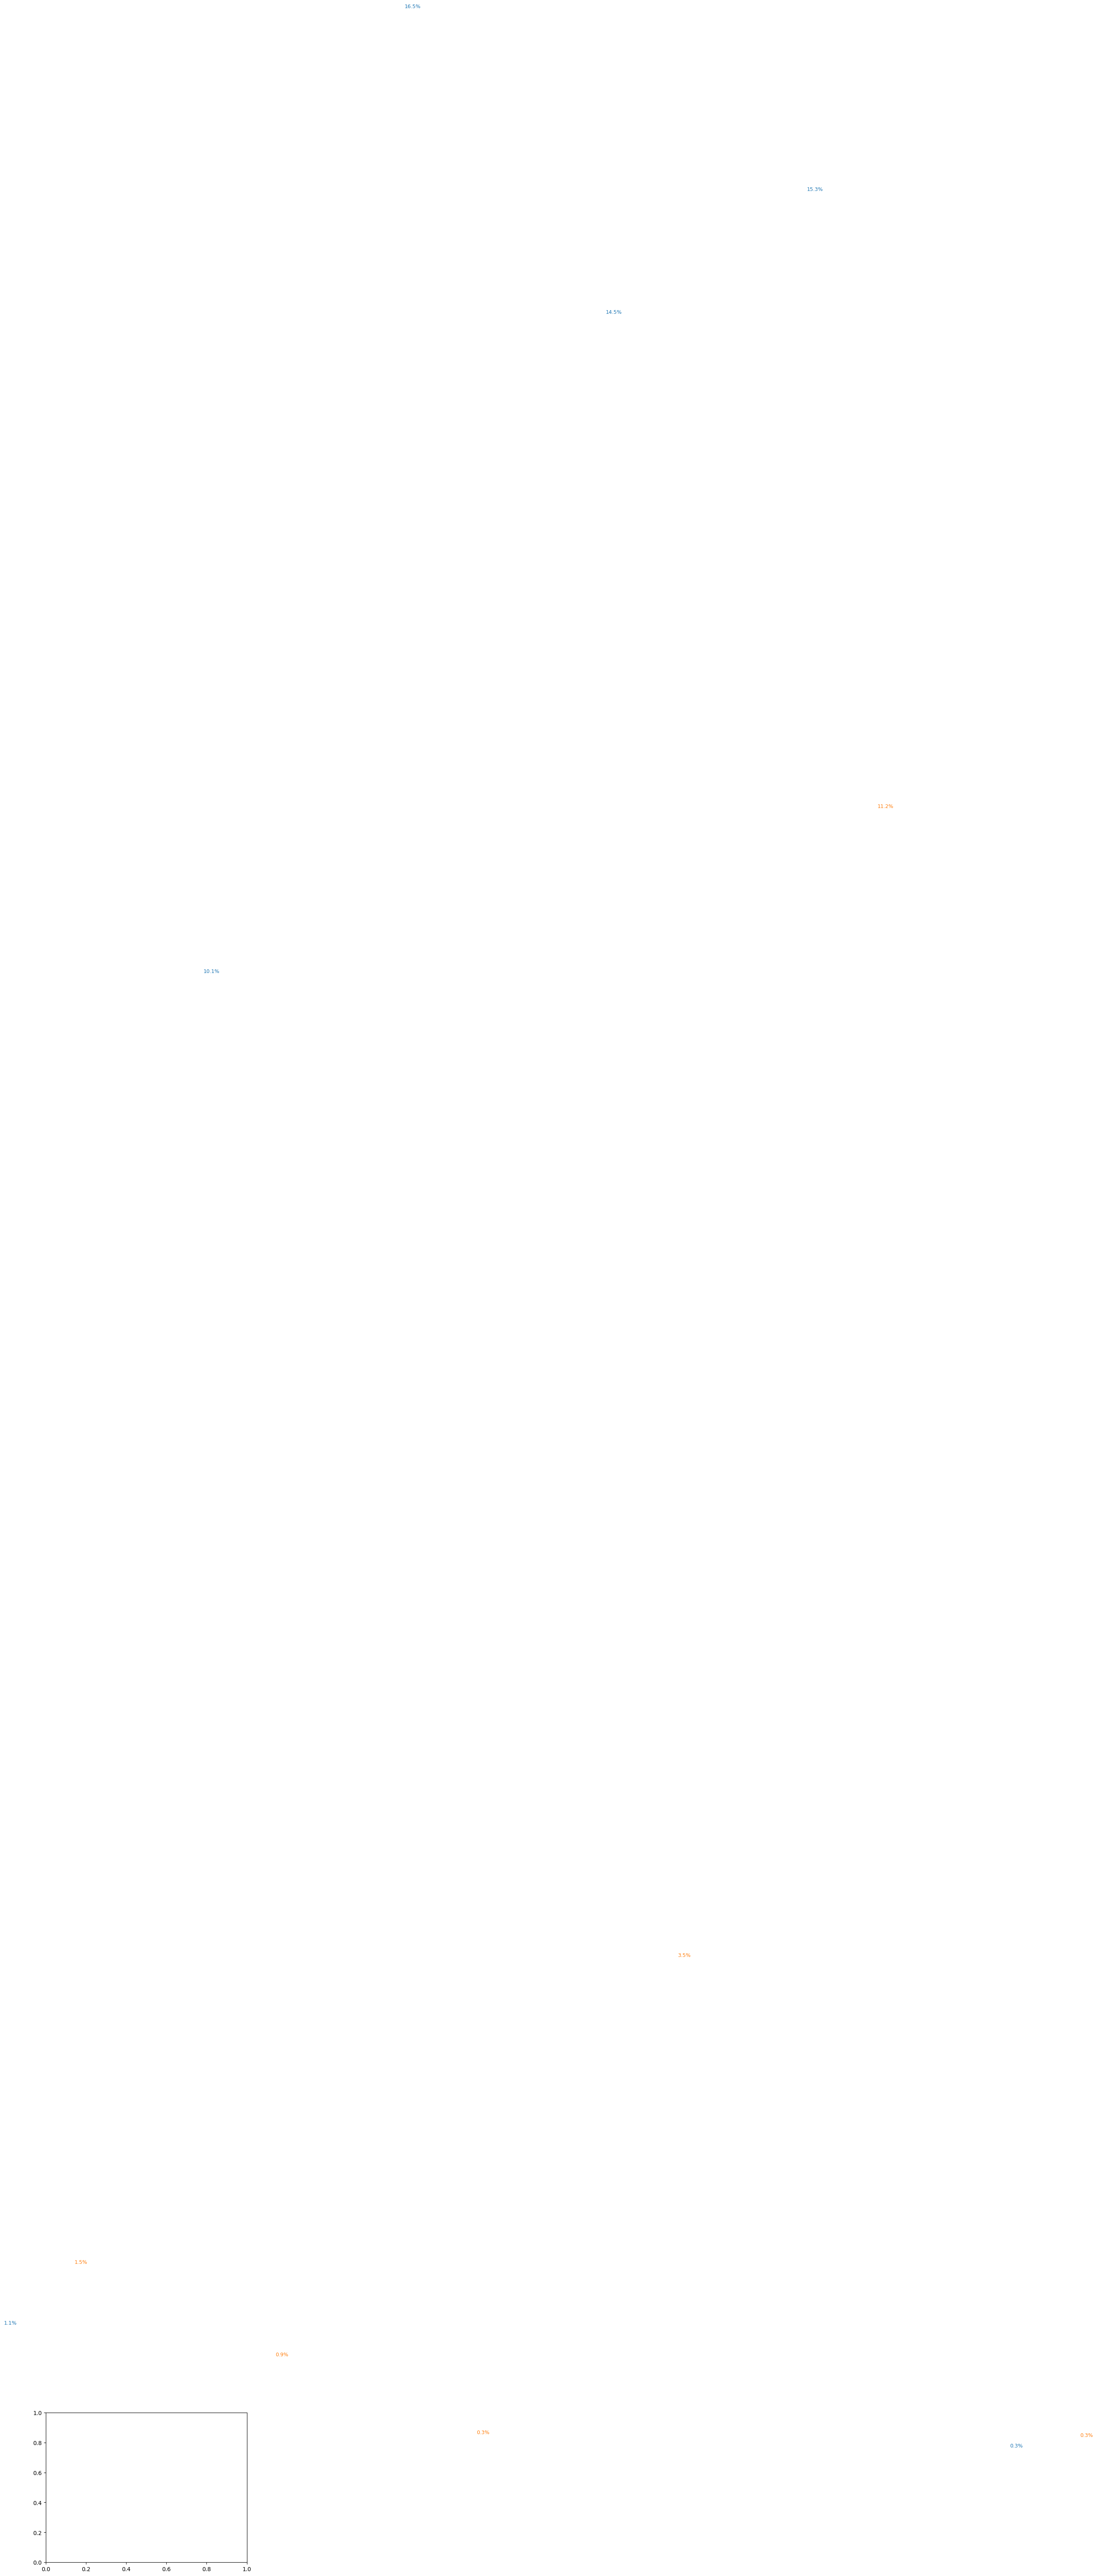

In [75]:
for i in range(len(x)):
    # Top 5000 Balken (links)
    plt.text(x[i] - width/2, top_values[i] + 0.5, f"{top_values[i]:.1f}%",
             ha='center', va='bottom', fontsize=9, color='#1f77b4')

    # Gesamtdatensatz Balken (rechts)
    plt.text(x[i] + width/2, gesamt_values[i] + 0.5, f"{gesamt_values[i]:.1f}%",
             ha='center', va='bottom', fontsize=9, color='#ff7f0e')

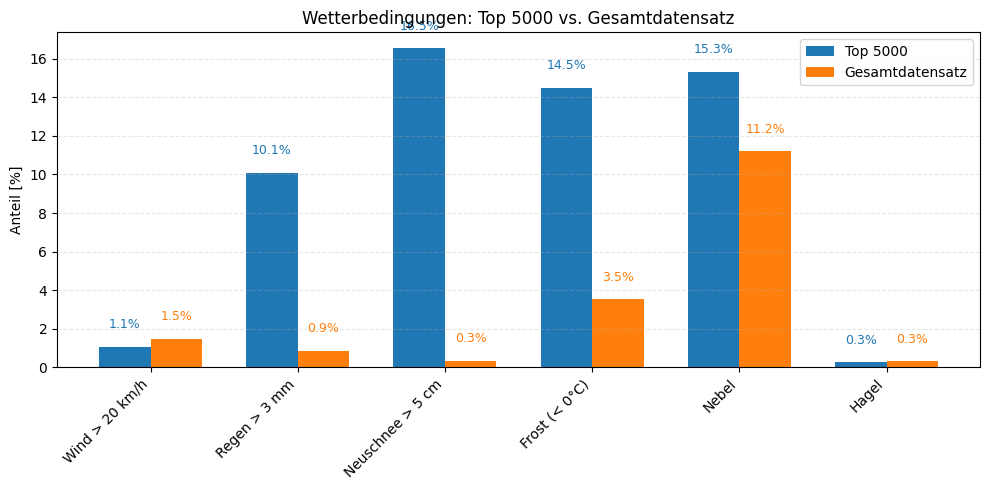

In [78]:
# Beschriftungen und Werte
labels = ['Wind > 20 km/h', 'Regen > 3 mm', 'Neuschnee > 5 cm', 'Frost (< 0°C)', 'Nebel', 'Hagel']
top_values = [wind_extrem, regen_extrem, schnee_extrem, frost, nebel, hagel]
gesamt_values = [gesamt_wind_extrem, gesamt_regen_extrem, gesamt_schnee_extrem, gesamt_frost, gesamt_nebel, gesamt_hagel]

# Balkenpositionen
x = np.arange(len(labels))
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar(x - width/2, top_values, width, label='Top 5000', color='#1f77b4')
bars2 = plt.bar(x + width/2, gesamt_values, width, label='Gesamtdatensatz', color='#ff7f0e')

# Balkenbeschriftung – über jedem Balken mit Abstand
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8,
             f"{height:.1f}%", ha='center', va='bottom', fontsize=9, color='#1f77b4')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.8,
             f"{height:.1f}%", ha='center', va='bottom', fontsize=9, color='#ff7f0e')

# Achsen & Layout
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Anteil [%]")
plt.title("Wetterbedingungen: Top 5000 vs. Gesamtdatensatz")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [81]:
# Wetterbeschreibung
top20['Wetterinfo'] = top20.apply(
    lambda row: f"Temp: {row['TEMPERATUR [°C]']}°C, Regen: {row['NIEDERSCHLAG [mm]']} mm, "
                f"Wind: {row['WINDGESCHWINDIGKEIT [kmh]']} km/h, "
                f"Nebel: {int(row['TAG_MIT_NEBEL']) if pd.notna(row['TAG_MIT_NEBEL']) else 'NaN'}, Schnee: {row['NEUSCHNEEHOEHE [cm]']} cm", # Handle NaN values
    axis=1
)


***BACK UP***

In [82]:
# Funktion für sichere Umwandlung Ja/Nein
def ja_nein(val):
    return 'Ja' if pd.notna(val) and val == 1 else 'Nein'

# Neue Version mit robuster Wetterinfo
top20['Wetterinfo'] = top20.apply(
    lambda row: f"Temp: {row.get('TEMPERATUR [°C]', '')}°C, Regen: {row.get('NIEDERSCHLAG [mm]', '')} mm, "
                f"Wind: {row.get('WINDGESCHWINDIGKEIT [kmh]', '')} km/h, "
                f"Nebel: {ja_nein(row.get('TAG_MIT_NEBEL'))}, "
                f"Schnee: {row.get('NEUSCHNEEHOEHE [cm]', '')} cm",
    axis=1
)

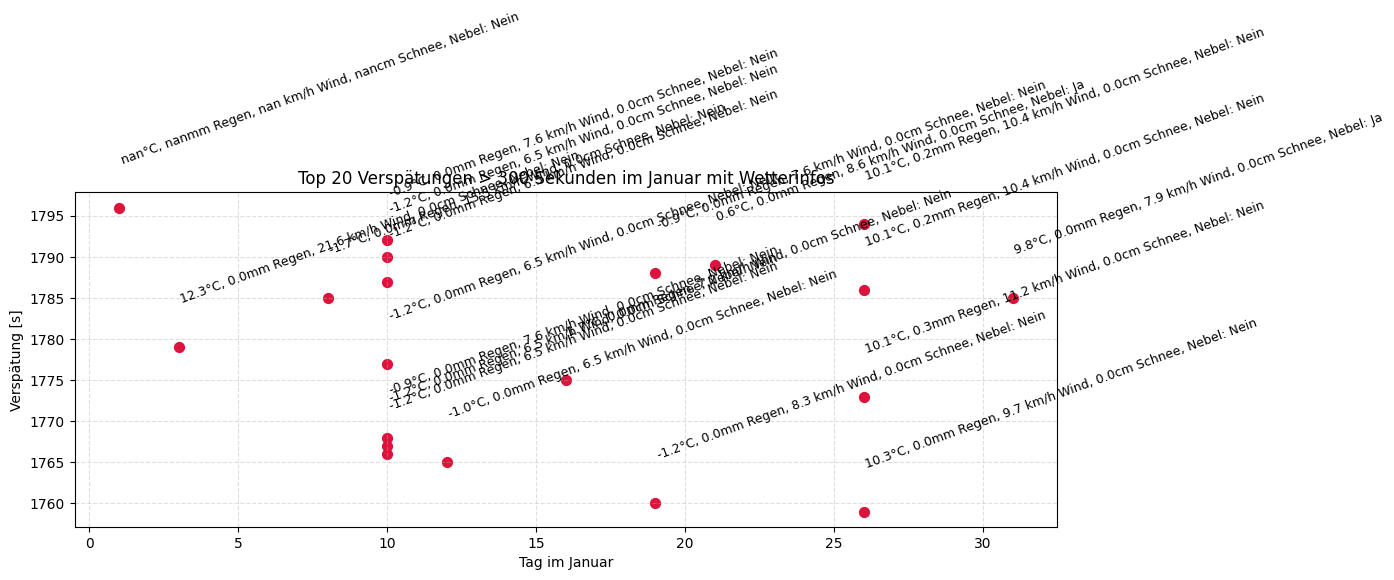

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Funktion: "Ja/Nein" bei 1 oder NaN
def ja_nein(val):
    return 'Ja' if pd.notna(val) and val == 1 else 'Nein'

# Sicherstellen, dass ABFAHRTSZEIT datetime ist
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'], errors='coerce')

# Januar & Verspätung > 300 s
df_januar = df[(df['ABFAHRTSZEIT'].dt.month == 1) & (df['VERSPAETUNG [s]'] > 300)]

# Top 20 extrahieren
top20 = df_januar.sort_values(by='VERSPAETUNG [s]', ascending=False).head(20).copy()
top20['TAG_IM_JANUAR'] = top20['ABFAHRTSZEIT'].dt.day

# Kürzere, schlichte Texte OHNE Emojis
top20['WETTERINFO'] = top20.apply(
    lambda row: f"{row['TEMPERATUR [°C]']:.1f}°C, {row['NIEDERSCHLAG [mm]']:.1f}mm Regen, "
                f"{row['WINDGESCHWINDIGKEIT [kmh]']:.1f} km/h Wind, {row['NEUSCHNEEHOEHE [cm]']:.1f}cm Schnee, "
                f"Nebel: {ja_nein(row['TAG_MIT_NEBEL'])}",
    axis=1
)

# Plot
plt.figure(figsize=(14, 6))
plt.scatter(top20['TAG_IM_JANUAR'], top20['VERSPAETUNG [s]'], color='crimson', s=50)

# Lesbare Textbeschriftungen über den Punkten
for i, row in top20.iterrows():
    plt.text(row['TAG_IM_JANUAR'], row['VERSPAETUNG [s]'] + 5, row['WETTERINFO'],
             fontsize=9, rotation=20, ha='left', va='bottom')

# Achsentitel und Layout
plt.title('Top 20 Verspätungen > 300 Sekunden im Januar mit Wetterinfos')
plt.xlabel('Tag im Januar')
plt.ylabel('Verspätung [s]')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

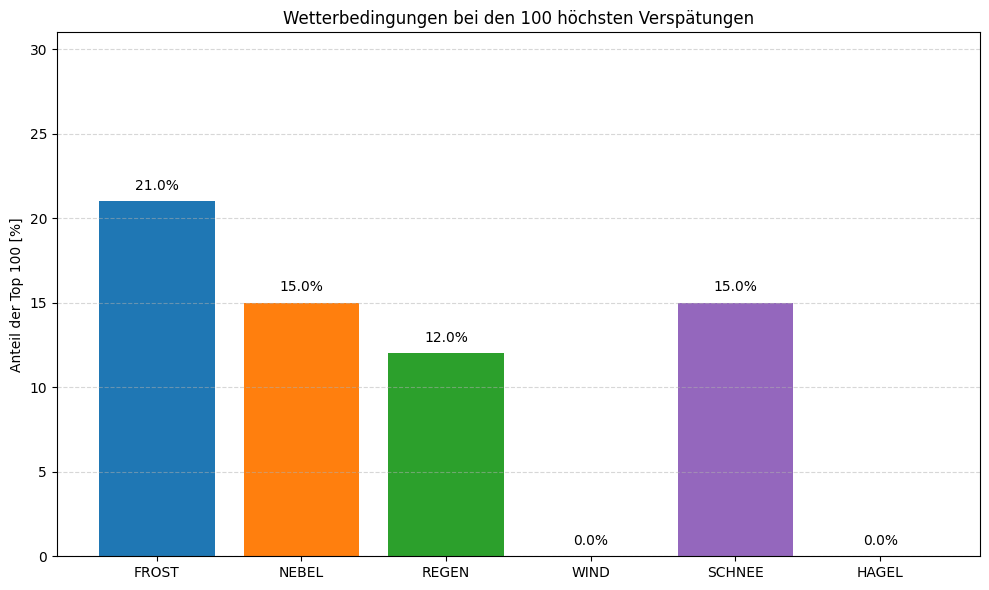

In [93]:
# Schritt 1: Top 100 Verspätungen extrahieren
df['VERSPAETUNG [s]'] = pd.to_numeric(df['VERSPAETUNG [s]'], errors='coerce')
top100 = df.sort_values(by='VERSPAETUNG [s]', ascending=False).head(100).copy()

# Schritt 2: Wetterbedingungen definieren
top100['FROST'] = top100['TEMPERATUR [°C]'] < 0
top100['NEBEL'] = top100['TAG_MIT_NEBEL'] == 1
top100['REGEN'] = top100['NIEDERSCHLAG [mm]'] > 3
top100['WIND'] = top100['WINDGESCHWINDIGKEIT [kmh]'] > 20
top100['SCHNEE'] = top100['NEUSCHNEEHOEHE [cm]'] > 5
top100['HAGEL'] = top100['TAG_MIT_HAGEL'] == 1

# Schritt 3: Prozentuale Anteile berechnen
bedingungen = ['FROST', 'NEBEL', 'REGEN', 'WIND', 'SCHNEE', 'HAGEL']
anteile = [(top100[b].sum() / len(top100)) * 100 for b in bedingungen]

# Schritt 4: Visualisierung als sauberes Balkendiagramm
plt.figure(figsize=(10, 6))
farben = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.bar(bedingungen, anteile, color=farben)

# Prozentwerte oberhalb der Balken anzeigen
for i, v in enumerate(anteile):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

# Achsentitel & Diagrammtitel
plt.ylabel('Anteil der Top 100 [%]')
plt.title('Wetterbedingungen bei den 100 höchsten Verspätungen')
plt.ylim(0, max(anteile) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

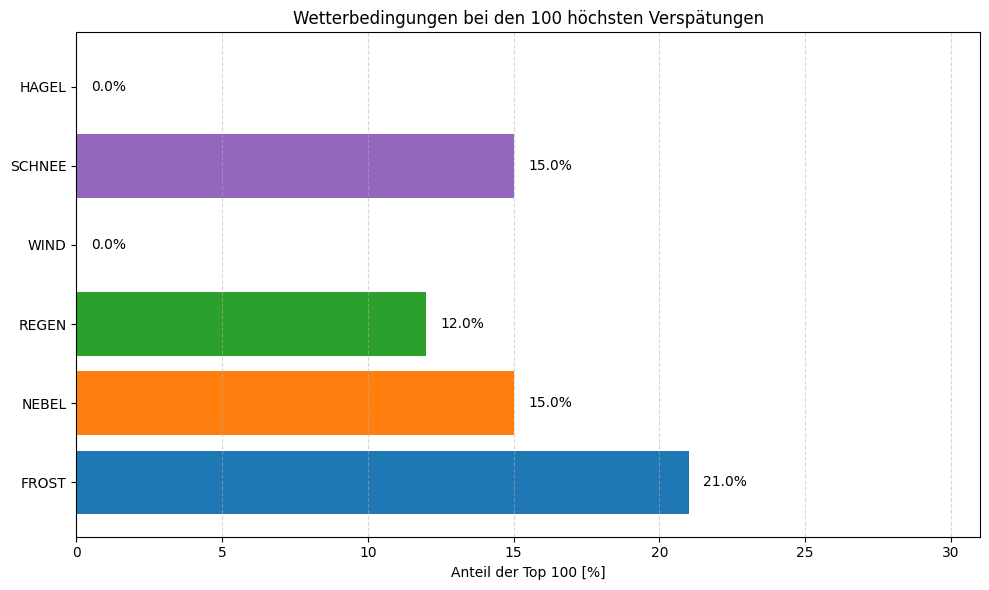

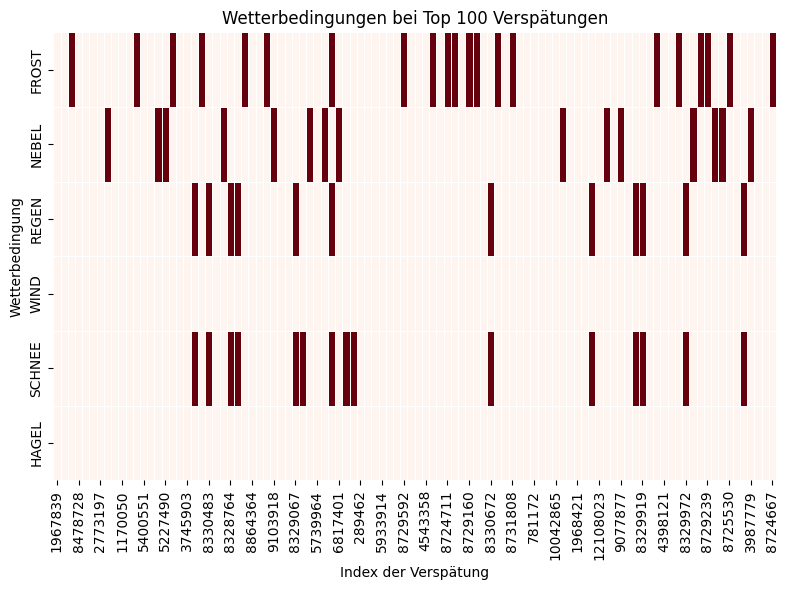

In [95]:
# Schritt 1: Top 100 Verspätungen extrahieren
df['VERSPAETUNG [s]'] = pd.to_numeric(df['VERSPAETUNG [s]'], errors='coerce')
top100 = df.sort_values(by='VERSPAETUNG [s]', ascending=False).head(100).copy()

# Schritt 2: Wetterbedingungen definieren
top100['FROST'] = top100['TEMPERATUR [°C]'] < 0
top100['NEBEL'] = top100['TAG_MIT_NEBEL'] == 1
top100['REGEN'] = top100['NIEDERSCHLAG [mm]'] > 3
top100['WIND'] = top100['WINDGESCHWINDIGKEIT [kmh]'] > 20
top100['SCHNEE'] = top100['NEUSCHNEEHOEHE [cm]'] > 5
top100['HAGEL'] = top100['TAG_MIT_HAGEL'] == 1

# Schritt 3: Prozentuale Anteile berechnen
bedingungen = ['FROST', 'NEBEL', 'REGEN', 'WIND', 'SCHNEE', 'HAGEL']
anteile = [(top100[b].sum() / len(top100)) * 100 for b in bedingungen]

# Schritt 4a: Alternative Darstellung als horizontales Balkendiagramm
plt.figure(figsize=(10, 6))
farben = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.barh(bedingungen, anteile, color=farben)

# Prozentwerte rechts neben den Balken anzeigen
for i, v in enumerate(anteile):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=10)

plt.xlabel('Anteil der Top 100 [%]')
plt.title('Wetterbedingungen bei den 100 höchsten Verspätungen')
plt.xlim(0, max(anteile) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Schritt 4b: Heatmap zur Übersicht der Wetterbedingungen (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(top100[bedingungen].T, cmap="Reds", cbar=False, linewidths=0.5)
plt.title("Wetterbedingungen bei Top 100 Verspätungen")
plt.ylabel("Wetterbedingung")
plt.xlabel("Index der Verspätung")
plt.tight_layout()
plt.show()

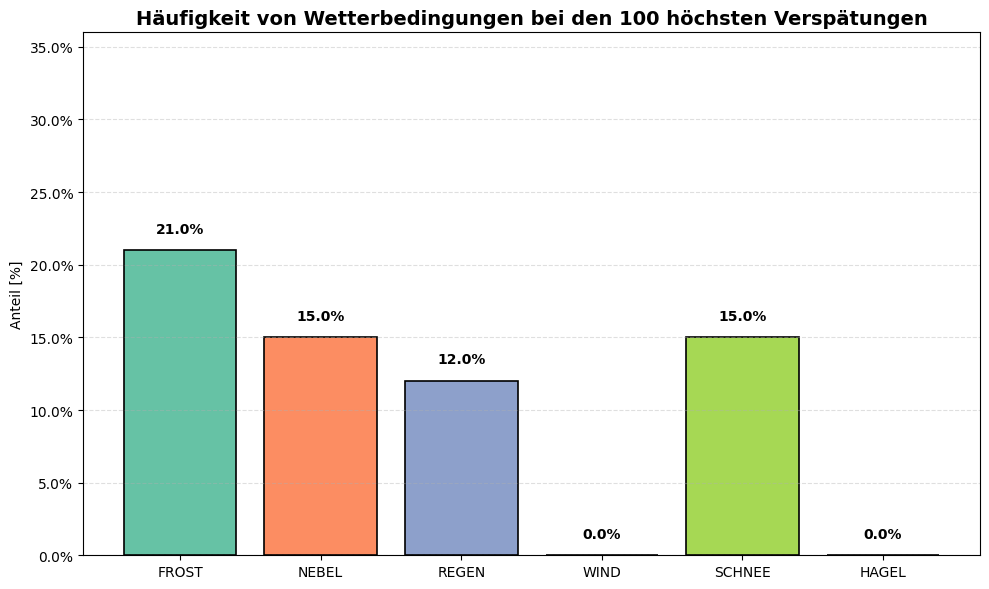

<ipython-input-96-b8b37fc6ae35>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




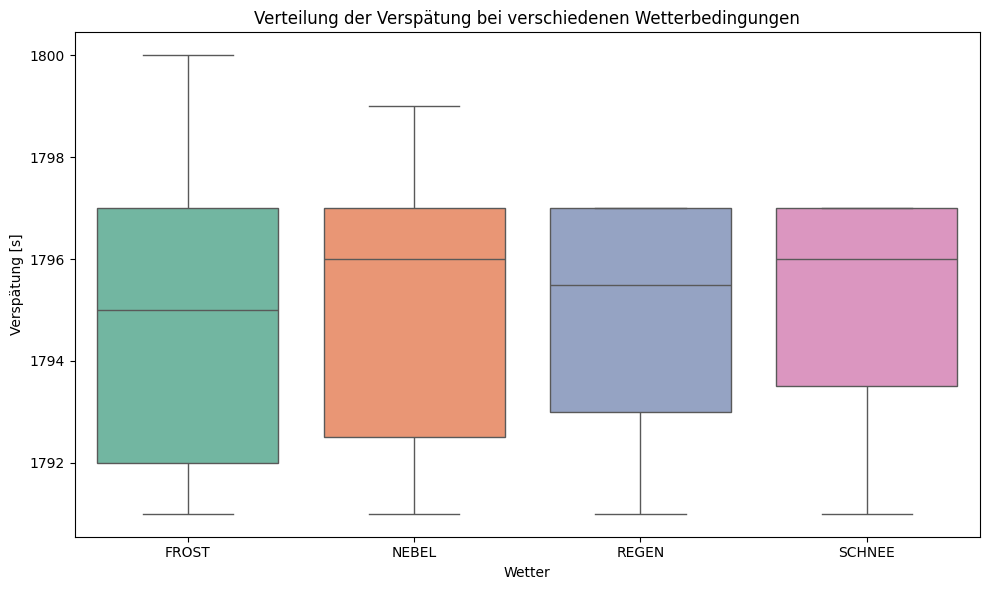

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick

# Schritt 1: Top 100 Verspätungen extrahieren
df['VERSPAETUNG [s]'] = pd.to_numeric(df['VERSPAETUNG [s]'], errors='coerce')
top100 = df.sort_values(by='VERSPAETUNG [s]', ascending=False).head(100).copy()

# Schritt 2: Wetterbedingungen definieren
top100['FROST'] = top100['TEMPERATUR [°C]'] < 0
top100['NEBEL'] = top100['TAG_MIT_NEBEL'] == 1
top100['REGEN'] = top100['NIEDERSCHLAG [mm]'] > 3
top100['WIND'] = top100['WINDGESCHWINDIGKEIT [kmh]'] > 20
top100['SCHNEE'] = top100['NEUSCHNEEHOEHE [cm]'] > 5
top100['HAGEL'] = top100['TAG_MIT_HAGEL'] == 1

# Schritt 3: Prozentuale Anteile berechnen
bedingungen = ['FROST', 'NEBEL', 'REGEN', 'WIND', 'SCHNEE', 'HAGEL']
anteile = [(top100[b].sum() / len(top100)) * 100 for b in bedingungen]

# Schritt 4: Kreativere Darstellung als stylisierte Balkengrafik
plt.figure(figsize=(10, 6))
farben = sns.color_palette("Set2", len(bedingungen))
bars = plt.bar(bedingungen, anteile, color=farben, edgecolor='black', linewidth=1.2)

# Prozentwerte auf den Balken anzeigen
for bar, wert in zip(bars, anteile):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{wert:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Design und Lesbarkeit verbessern
plt.title('Häufigkeit von Wetterbedingungen bei den 100 höchsten Verspätungen', fontsize=14, fontweight='bold')
plt.ylabel('Anteil [%]')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylim(0, max(anteile) + 15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Bonus: Boxplot zur Verteilung der Verspätung je Wetterbedingung
plt.figure(figsize=(10, 6))
plotdata = pd.melt(top100[['VERSPAETUNG [s]'] + bedingungen], id_vars='VERSPAETUNG [s]', var_name='Wetter', value_name='Bedingung')
plotdata = plotdata[plotdata['Bedingung'] == True]
sns.boxplot(x='Wetter', y='VERSPAETUNG [s]', data=plotdata, palette="Set2")
plt.title('Verteilung der Verspätung bei verschiedenen Wetterbedingungen')
plt.ylabel('Verspätung [s]')
plt.tight_layout()
plt.show()

In [31]:
display(top5000[['VERSPAETUNG [s]', 'TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]']].describe())

,VERSPAETUNG [s],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh]
count,5000.000000,4983.000000,4983.000000,4983.000000
mean,1556.814800,8.501144,0.501967,8.151802
std,129.196183,8.340135,1.100713,3.580936
min,1355.000000,-3.300000,0.000000,2.500000
25%,1444.000000,0.100000,0.000000,5.800000
50%,1544.000000,7.400000,0.000000,7.600000
75%,1667.000000,14.100000,0.300000,9.700000
max,1800.000000,32.900000,7.500000,26.300000


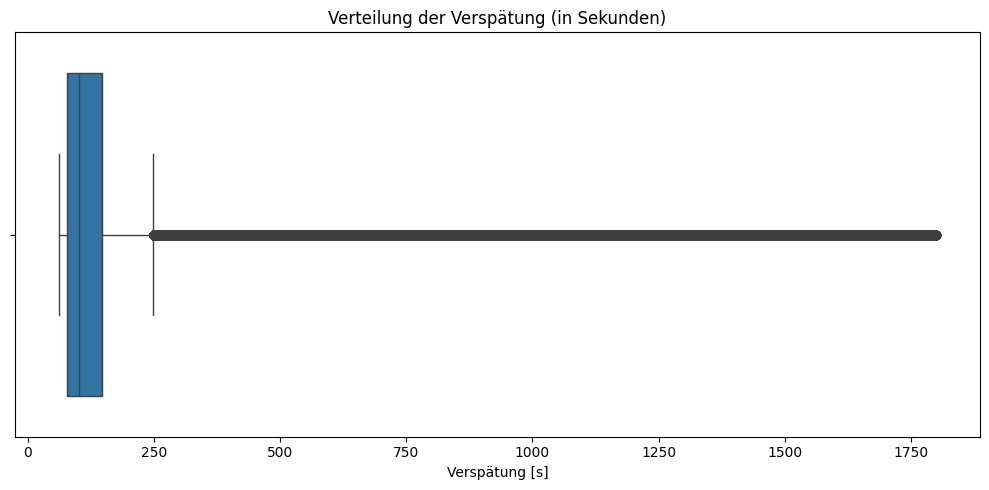

In [22]:
# Plot für Verspätungen erstellen
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['VERSPAETUNG [s]'])

# Achsentitel usw.
plt.title('Verteilung der Verspätung (in Sekunden)')
plt.xlabel('Verspätung [s]')
plt.tight_layout()
plt.show()

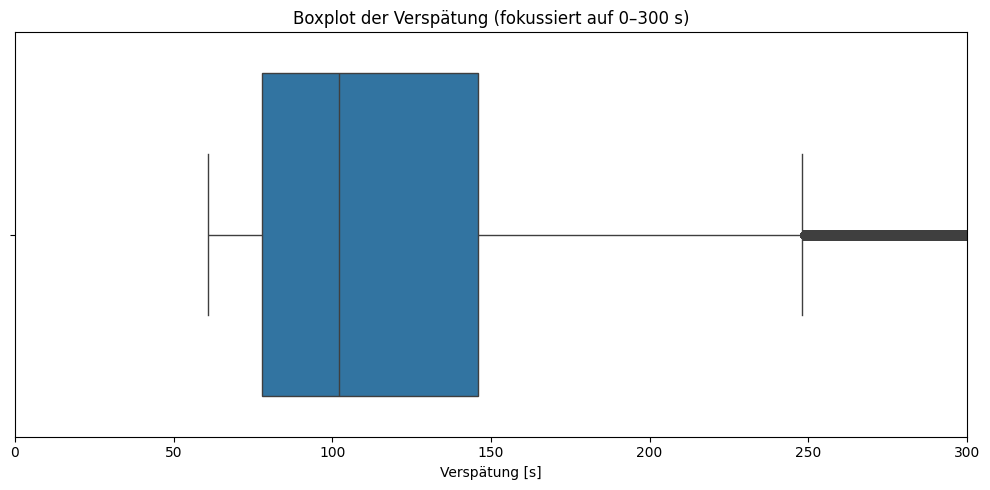

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['VERSPAETUNG [s]'])
plt.xlim(0, 300)  # Fokus auf Hauptverteilung
plt.title('Boxplot der Verspätung (fokussiert auf 0–300 s)')
plt.xlabel('Verspätung [s]')
plt.tight_layout()
plt.show()

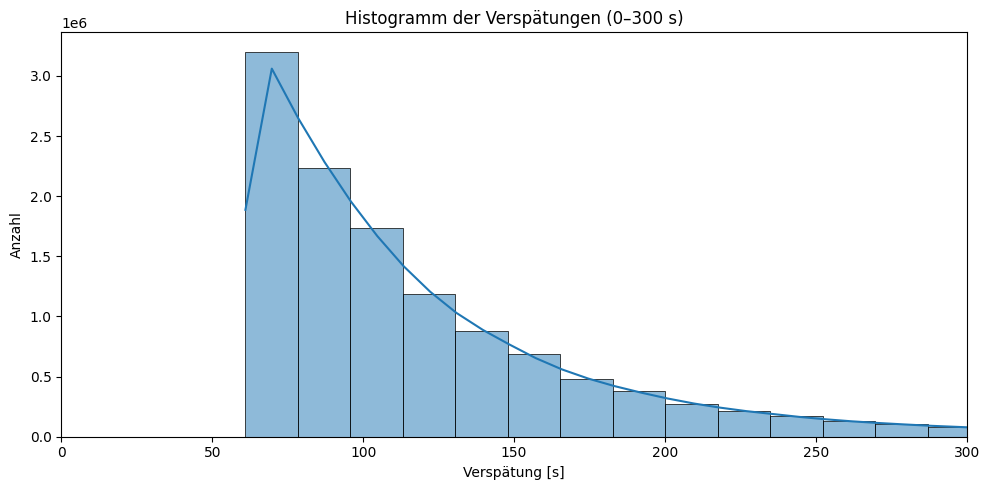

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(df['VERSPAETUNG [s]'], bins=100, kde=True)  # optional: binwidth=10
plt.xlim(0, 300)
plt.title('Histogramm der Verspätungen (0–300 s)')
plt.xlabel('Verspätung [s]')
plt.ylabel('Anzahl')
plt.tight_layout()
plt.show()

In [18]:
print(df.columns.tolist())

['LINIEN_TEXT', 'HALTESTELLEN_NAME', 'ABFAHRTSZEIT', 'AB_PROGNOSE', 'AB_PROGNOSE_STATUS', 'VERSPAETUNG [s]', 'WETTERSTATION', 'BOEENSPITZE [kmh]', 'GLOBALSTRAHLUNG [Wm2]', 'TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]', 'SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]', 'TAG_MIT_HAGEL', 'TAG_MIT_NEBEL', 'GPS_LATITUDE', 'GPS_LONGITUDE']


In [19]:
pd.set_option('display.max_columns', None)  # zeigt alle Spalten
pd.set_option('display.max_rows', 20)       # z. B. maximal 20 Zeilen

display(df.head(10))  # zeige die ersten 10 Zeilen von ALLEM

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.396090,8.545105
5,10,"Zürich, Langmauerstrasse",2024-01-01 04:42:00,2024-01-01 04:45:15,REAL,195.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.393788,8.544964
6,10,"Zürich, Letzistrasse",2024-01-01 04:43:00,2024-01-01 04:46:08,REAL,188.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.390906,8.545434
7,10,"Zürich, Kinkelstrasse",2024-01-01 04:44:00,2024-01-01 04:46:51,REAL,171.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.388801,8.546384
8,10,"Zürich, Sternen Oerlikon",2024-01-01 04:44:00,2024-01-01 04:45:45,REAL,105.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.410213,8.545994
9,12,Glattpark,2024-01-01 04:45:00,2024-01-01 04:46:21,REAL,81.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.421259,8.557105


In [16]:
# Verspätung sicherstellen als Zahl
df['VERSPAETUNG [s]'] = pd.to_numeric(df['VERSPAETUNG [s]'], errors='coerce')

# Top 100000 Verspätungen holen
top100000 = df.sort_values(by='VERSPAETUNG [s]', ascending=False).head(100000).copy()

# Erste paar Zeilen anzeigen zur Kontrolle
display(top100000[['ABFAHRTSZEIT', 'HALTESTELLEN_NAME', 'VERSPAETUNG [s]']])


,ABFAHRTSZEIT,HALTESTELLEN_NAME,VERSPAETUNG [s]
1967839,2024-03-06 11:00:00,"Zürich, Wetlistrasse",1800.0
3745917,2024-08-10 09:06:00,"Zürich, Laubiweg",1800.0
8731403,2024-11-22 07:43:00,"Zürich, Friedhof Enzenbühl",1800.0
8478728,2024-03-22 20:27:00,"Zürich, Sihlquai/HB",1800.0
7296541,2024-04-19 11:47:00,"Zürich, Farbhof",1800.0
...,...,...,...
8468562,2024-03-22 15:36:00,"Zürich, Hedwigsteig",499.0
2440249,2024-05-07 12:53:00,"Zürich, Paradeplatz",499.0
2440369,2024-05-07 12:56:00,"Zürich, Bahnhof Selnau",499.0
153888,2024-06-01 16:59:00,"Zürich, Kantonalbank",499.0


In [9]:
display(top100000[['ABFAHRTSZEIT', 'HALTESTELLEN_NAME', 'VERSPAETUNG [s]',
                'TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]']])

,ABFAHRTSZEIT,HALTESTELLEN_NAME,VERSPAETUNG [s],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm]
1967839,2024-03-06 11:00:00,"Zürich, Wetlistrasse",1800.0,3.4,0.3,6.5,0.0
3745917,2024-08-10 09:06:00,"Zürich, Laubiweg",1800.0,25.9,0.0,5.8,0.0
8731403,2024-11-22 07:43:00,"Zürich, Friedhof Enzenbühl",1800.0,-1.4,0.0,3.6,1.0
8478728,2024-03-22 20:27:00,"Zürich, Sihlquai/HB",1800.0,14.2,0.0,6.8,0.0
7296541,2024-04-19 11:47:00,"Zürich, Farbhof",1800.0,7.3,0.0,19.1,0.0
...,...,...,...,...,...,...,...
8729996,2024-11-22 07:13:00,"Zürich, Waffenplatzstrasse",1748.0,-1.4,0.0,3.6,1.0
1968279,2024-03-06 11:14:00,"Zürich, Wetlistrasse",1748.0,3.4,0.3,6.5,0.0
8330265,2024-11-21 18:28:00,"Zürich, Kronenstrasse",1747.0,0.0,3.3,7.6,17.0
5227123,2024-03-14 13:55:00,"Zürich, Bahnhof Stadelhofen",1747.0,14.5,0.0,4.3,0.0


In [10]:
# Die Top 500 Verspätungen nach Datum sortieren

top500 = df.sort_values(by='VERSPAETUNG [s]', ascending=False).head(500).copy()
top500 = top500.sort_values(by='ABFAHRTSZEIT')  # Neu: Zeitliche Sortierung

display(top500[['ABFAHRTSZEIT', 'HALTESTELLEN_NAME', 'VERSPAETUNG [s]']])

,ABFAHRTSZEIT,HALTESTELLEN_NAME,VERSPAETUNG [s]
716687,2024-01-03 10:11:00,"Zürich, Goldbrunnenplatz",1779.0
2716200,2024-01-08 15:52:00,"Zürich, Bürkliplatz",1785.0
3528060,2024-01-10 14:02:00,"Zürich, Haldenegg",1750.0
3528150,2024-01-10 14:04:00,"Zürich, ETH/Universitätsspital",1766.0
3528179,2024-01-10 14:05:00,"Zürich, Haldenbach",1754.0
...,...,...,...
4712471,2024-12-12 12:43:00,"Zürich, Billoweg",1776.0
5933914,2024-12-15 15:25:00,"Zürich, Langmauerstrasse",1796.0
6742277,2024-12-17 14:45:00,"Zürich, Escher-Wyss-Platz",1749.0
7952272,2024-12-20 15:22:00,"Zürich, Rehalp",1760.0


In [13]:
display(top500[['ABFAHRTSZEIT', 'HALTESTELLEN_NAME', 'VERSPAETUNG [s]',
                'TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]']])

,ABFAHRTSZEIT,HALTESTELLEN_NAME,VERSPAETUNG [s],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm]
716687,2024-01-03 10:11:00,"Zürich, Goldbrunnenplatz",1779.0,12.3,0.0,21.6,0.0
2716200,2024-01-08 15:52:00,"Zürich, Bürkliplatz",1785.0,-1.7,0.0,15.5,0.0
3528060,2024-01-10 14:02:00,"Zürich, Haldenegg",1750.0,-1.2,0.0,6.5,0.0
3528150,2024-01-10 14:04:00,"Zürich, ETH/Universitätsspital",1766.0,-1.2,0.0,6.5,0.0
3528179,2024-01-10 14:05:00,"Zürich, Haldenbach",1754.0,-1.2,0.0,6.5,0.0
...,...,...,...,...,...,...,...
4712471,2024-12-12 12:43:00,"Zürich, Billoweg",1776.0,2.6,0.0,5.8,0.0
5933914,2024-12-15 15:25:00,"Zürich, Langmauerstrasse",1796.0,5.0,0.0,8.6,0.0
6742277,2024-12-17 14:45:00,"Zürich, Escher-Wyss-Platz",1749.0,8.3,0.0,4.0,0.0
7952272,2024-12-20 15:22:00,"Zürich, Rehalp",1760.0,3.9,0.0,10.4,0.0


In [12]:
# Durchschnittliche Wetterlage bei diesen Top 500 Verspätungen

top500[['TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]', 'NEUSCHNEEHOEHE [cm]']].mean()


,0
TEMPERATUR [°C],8.307014
NIEDERSCHLAG [mm],0.557315
WINDGESCHWINDIGKEIT [kmh],8.072144
NEUSCHNEEHOEHE [cm],3.400802
